In [2]:
import matplotlib.pyplot as plt
import numpy as np
from utils import *

In [3]:
test_cases = [0,1,2,3,4,5,'train_83p']
y_pred = np.empty((0,6,21))
y_gt = np.empty((0,6,21))

for tc in test_cases:
    print(f"start {tc}")
    model_folder = f"../training/saved/2024-04-03/{tc}_1_8_octaves"
    archive = np.load(model_folder + "/predictions.npz")
    print(f"{tc}: loaded archive")
    y_pred = np.concatenate((y_pred, archive["y_pred"]), axis=0)
    print(f"{tc}: loaded pred")
    y_gt = np.concatenate((y_gt, archive["y_gt"]), axis=0)
    print(f"{tc}: loaded gt")

start 0
0: loaded archive
0: loaded pred
0: loaded gt
start 1
1: loaded archive
1: loaded pred
1: loaded gt
start 2
2: loaded archive
2: loaded pred
2: loaded gt
start 3
3: loaded archive
3: loaded pred
3: loaded gt
start 4
4: loaded archive
4: loaded pred
4: loaded gt
start 5
5: loaded archive
5: loaded pred
5: loaded gt
start train_83p
train_83p: loaded archive
train_83p: loaded pred
train_83p: loaded gt


String: 0
x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14]
y: [0.8123579632700694, 0.857684355616816, 0.8729121278140886, 0.8788460119530731, 0.8020810107766629, 0.5481758652946679, 0.7870796460176991, 0.32654619496054976, 0.4239777689559349, 0.059293804130579615, 0.06720647773279352, 0.0, 0.0, 0.0]



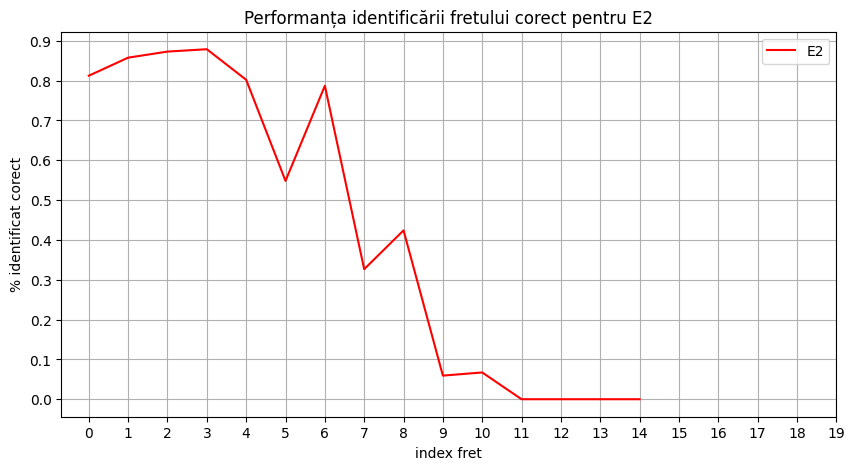

String: 1
x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
y: [0.5731989077924806, 0.5000932314003357, 0.8668033922731556, 0.9113630880579011, 0.9175850680915804, 0.7676555949693648, 0.9051585501628798, 0.6619339272457313, 0.7329359895493142, 0.37645937574457944, 0.14363010329562223, 0.0927555856465809, 0.05688888888888889, 0.0]



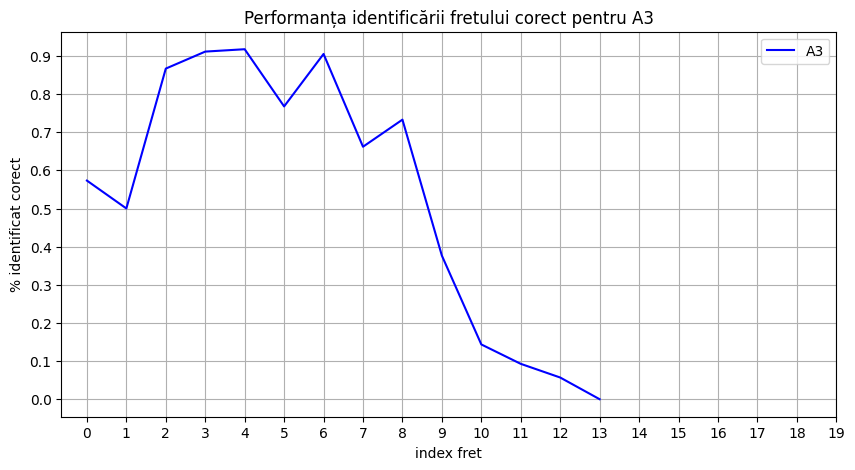

String: 2
x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
y: [0.7091074230038807, 0.2952210808396606, 0.780633147113594, 0.8083365200764818, 0.8006588141345578, 0.7091292758773878, 0.8361788491928237, 0.7167487684729064, 0.7914285714285715, 0.5755036716249294, 0.6358292079207921, 0.4090121317157712, 0.05162116040955631, 0.010471204188481676, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]



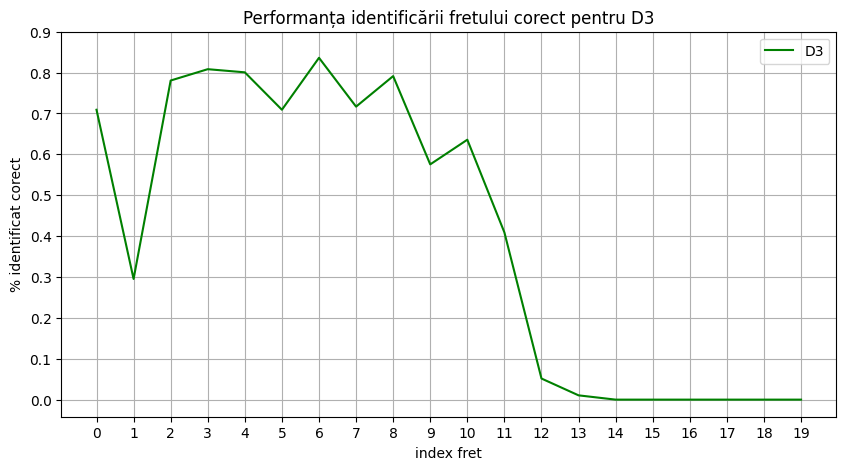

String: 3
x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
y: [0.7420382165605095, 0.7406094369882671, 0.713620759876651, 0.716659761543065, 0.648157547457111, 0.7371909623107069, 0.8003000916946845, 0.7655516682310778, 0.716841513675534, 0.6190476190476191, 0.5492438563327032, 0.4790937557561245, 0.1958128078817734, 0.11333794056668971, 0.0, 0.03685897435897436, 0.0, 0.0, 0.0]



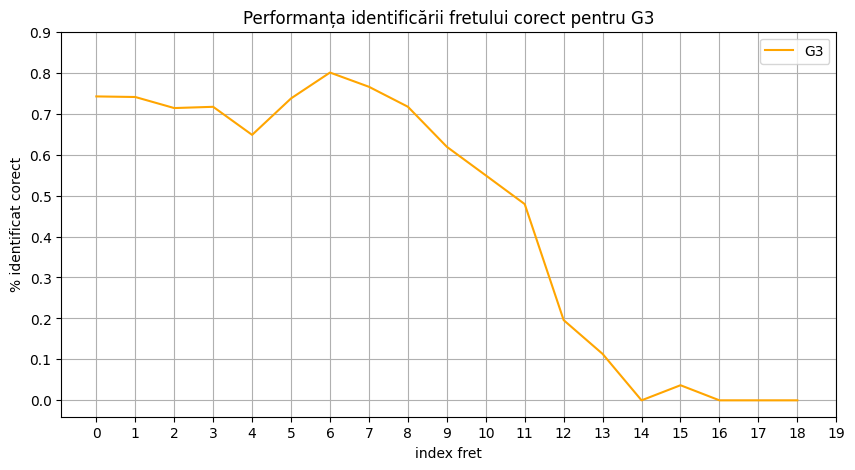

String: 4
x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]
y: [0.6749945211483673, 0.7726402817117048, 0.6255447032306537, 0.5663569802498001, 0.661993016384636, 0.6133814864094279, 0.715894392452256, 0.6895649329407916, 0.7928359111290242, 0.6176143651132963, 0.70588866244771, 0.5698164055920498, 0.6486217203586848, 0.4830126893164142, 0.10457516339869281, 0.024930747922437674, 0.0, 0.0, 0.0]



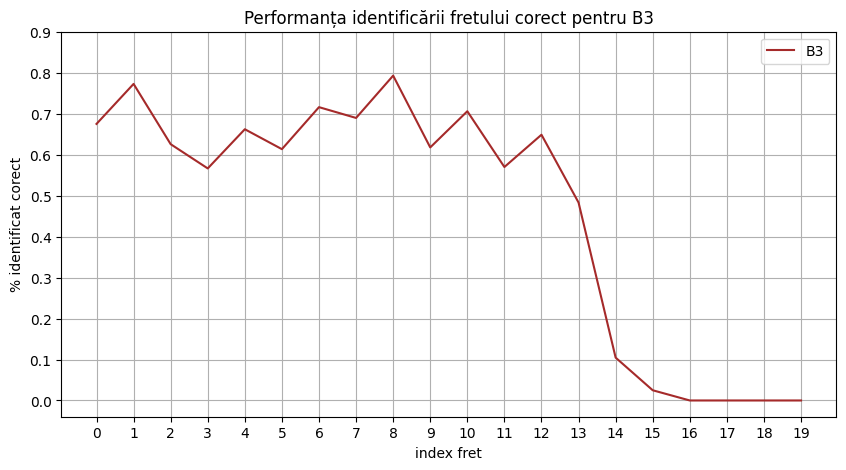

String: 5
x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
y: [0.6299205648720212, 0.47468453030066987, 0.46797875663855043, 0.5069535554972449, 0.6057336621454994, 0.5598516353827133, 0.567320819112628, 0.5998889094612109, 0.6030230708035004, 0.6110992071994857, 0.5385978731784167, 0.6854256854256854, 0.7807061163600199, 0.6925592804578904, 0.21710526315789475, 0.0, 0.0, 0.0]



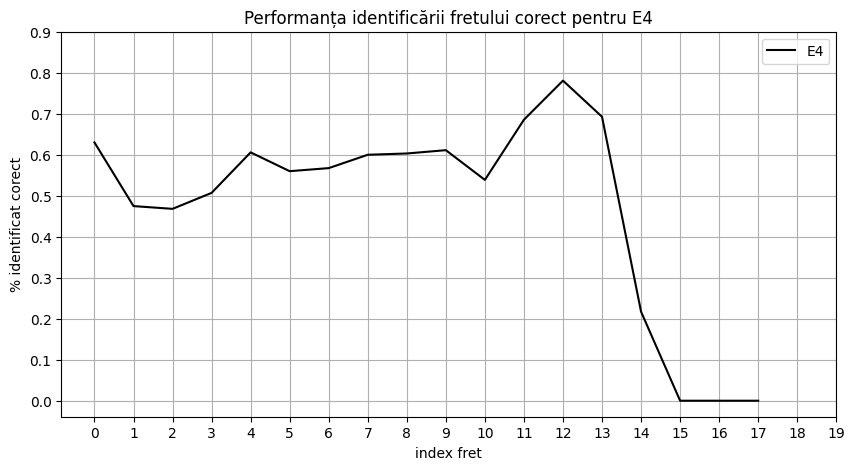

In [38]:
strings = ['E2', 'A3', 'D3', 'G3', 'B3', 'E4']
colors = ['red', 'blue', 'green', 'orange', 'brown', 'black']
results = []

for string in range(0,6):
    fret_gt_1 = [0] * 21
    fret_pred_1 = [0] * 21

    fret_gt_2 = [0] * 21
    fret_pred_2 = [0] * 21

    for i in range(len(y_pred)):
        gt_index = np.argmax(y_gt[i][string])
        pred_index = np.argmax(y_pred[i][string])
        if gt_index > 0:
            fret_gt_1[gt_index] += 1
            if gt_index == pred_index:
                fret_pred_1[pred_index] += 1

        if pred_index > 0:
            fret_pred_2[pred_index] += 1
            if gt_index == pred_index:
                fret_gt_2[gt_index] += 1

    x_gt = []
    x_pred = []
    y_values_gt = []
    y_values_pred = []
    for i in range(len(fret_gt_1)):
        if fret_gt_1[i] > 0:
            x_gt.append(i - 1)
            y_values_gt.append(fret_pred_1[i] / fret_gt_1[i])
        if fret_pred_2[i] > 0:
            x_pred.append(i-1)
            y_values_pred.append(fret_gt_2[i] / fret_pred_2[i])
    results.append(
        {
            "x" : x_gt,
            "y" : y_values_gt
        }
    )
    print(f"String: {string}\nx: {x_gt}\ny: {y_values_gt}\n")
    plt.figure(figsize=(10,5))
    plt.plot(x_gt, y_values_gt, label=f"{strings[string]}", color=colors[string])
    #plt.plot(x_pred, y_values_pred, label=f"{strings[string]} pred", color=colors[string], linestyle='dotted')
    plt.grid(True)
    plt.legend()
    plt.title(f'Performanța identificării fretului corect pentru {strings[string]}')
    plt.xlabel('index fret')
    plt.ylabel('% identificat corect')
    plt.xticks(np.arange(0, 20, step=1))
    plt.yticks(np.arange(0,1,step=0.1))
    plt.show()

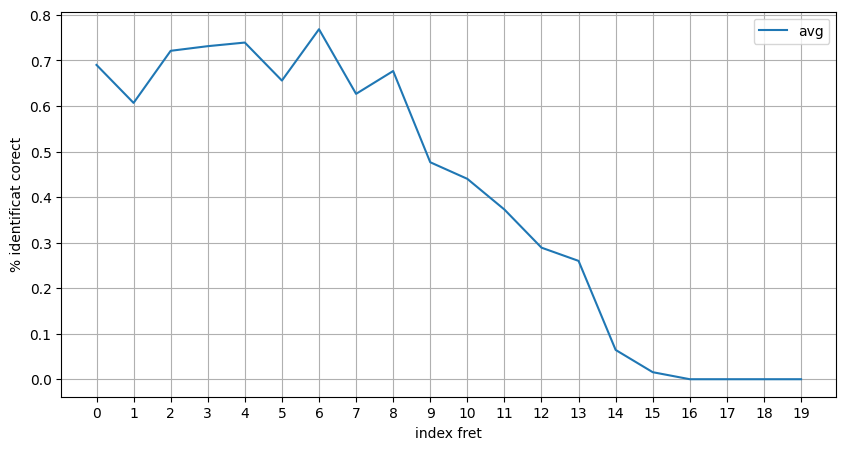

In [32]:
x_total = []
y_total = []
for i in range(0, 20):
    k = 0
    sum = 0
    for string in range(0,6):
        if i in results[string]["x"]:
            idx = results[string]["x"].index(i)
            k += 1
            sum += results[string]["y"][idx]
    if k > 0:
        x_total.append(i)
        y_total.append(sum/k)

plt.figure(figsize=(10,5))
plt.plot(x_total, y_total, label=f"avg")
plt.grid(True)
plt.legend()
plt.xlabel('index fret')
plt.ylabel('% identificat corect')
plt.xticks(np.arange(0, 20, step=1))
plt.show()